In [1]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = ps.connect(dbname="Northwind",
                  user="postgres",
                  password="3906",
                  port="5432")

In [3]:
sql="""WITH tablo AS (
    SELECT
        o.ship_country,
        s.company_name AS shippers,
        AVG(AGE(o.shipped_date, o.order_date)) AS AvgDeliveryTime
    FROM
        Orders o
    JOIN
        shippers s ON o.ship_via = s.shipper_id
    WHERE
        o.shipped_date IS NOT NULL
    GROUP BY 
        o.ship_country, s.company_name
    ORDER BY 
        o.ship_country
)
SELECT 
    ship_country,
    CAST(EXTRACT(EPOCH FROM AVG(AvgDeliveryTime)) / 86400 AS INTEGER) AS adt
FROM 
    tablo
GROUP BY 
    ship_country
ORDER BY 
    ship_country;"""

In [4]:
df=sqlio.read_sql_query(sql,conn)
df.head()

C:\Users\burak\AppData\Local\Temp\ipykernel_27224\1287515234.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=sqlio.read_sql_query(sql,conn)


,ship_country,adt
0,Argentina,9
1,Austria,9
2,Belgium,10
3,Brazil,8
4,Canada,6


In [5]:
df.shape

(21, 2)

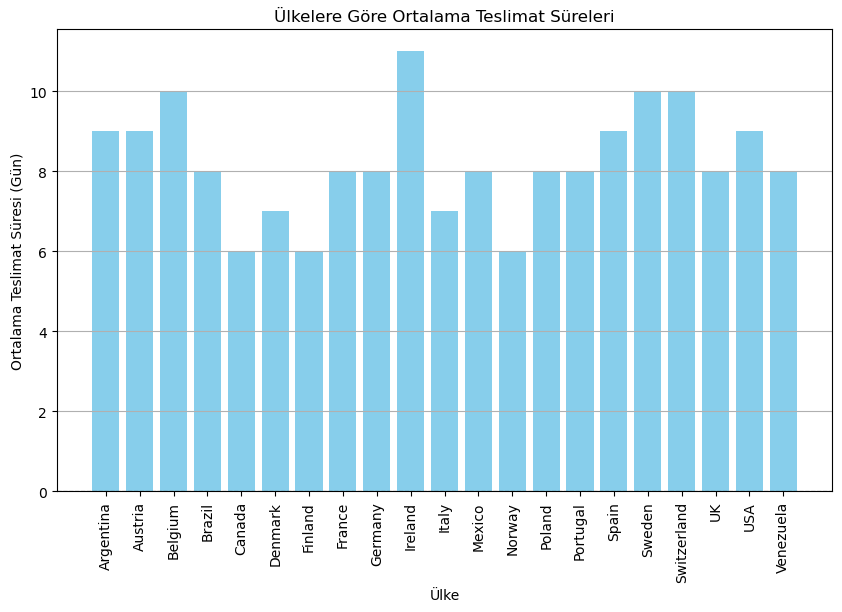

In [6]:
avg_delivery_by_country = df.groupby('ship_country')['adt'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_delivery_by_country['ship_country'], avg_delivery_by_country['adt'], color='skyblue')
plt.title('Ülkelere Göre Ortalama Teslimat Süreleri')
plt.xlabel('Ülke')
plt.ylabel('Ortalama Teslimat Süresi (Gün)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

In [7]:
sql2= """SELECT 
    o.ship_country, 
    COUNT(*) AS total_orders
FROM 
    Orders o
GROUP BY 
    o.ship_country
ORDER BY 
    total_orders DESC;"""

In [8]:
df2=sqlio.read_sql_query(sql2,conn)
df2.head()

C:\Users\burak\AppData\Local\Temp\ipykernel_27224\3576044501.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2=sqlio.read_sql_query(sql2,conn)


,ship_country,total_orders
0,Germany,122
1,USA,122
2,Brazil,83
3,France,77
4,UK,56


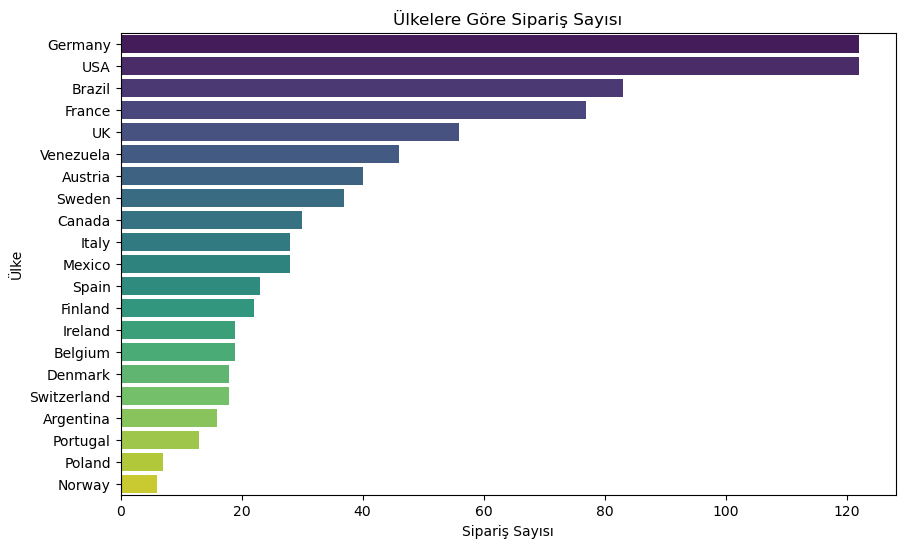

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='total_orders', y='ship_country', data=df2, palette='viridis')
plt.xlabel('Sipariş Sayısı')
plt.ylabel('Ülke')
plt.title('Ülkelere Göre Sipariş Sayısı')
plt.show()